In [339]:
#Spam Detection

In [340]:
import warnings
warnings.filterwarnings('ignore')

In [341]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [342]:
%matplotlib inline

In [343]:
df = pd.read_csv('SMSSpamCollection',sep='\t',names=['label','message'])

In [344]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label      5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [346]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [347]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [348]:
df['length'] = df['message'].apply(lambda x: len(x))

In [349]:
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


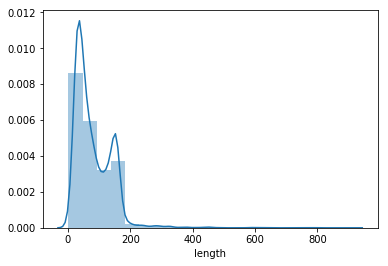

In [350]:
sns.distplot(df['length'],bins=20)

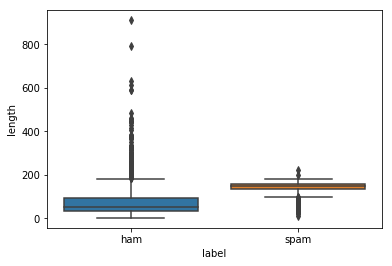

In [351]:
sns.boxplot(x='label',y='length',data=df)
# We see that spam messages tend to be of a bit greater length than ham

In [352]:
import nltk

In [353]:
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer

In [355]:
stopwords.words('english')
lemmatizer = WordNetLemmatizer()
corpus=[]

In [356]:
def process(sentence):
    removed_punc = [i.lower() for i in sentence.split() if i not in punctuation]
    removed_sw = [i for i in removed_punc if i not in stopwords.words('english')]
    lemmatized_string = [lemmatizer.lemmatize(i) for i in removed_sw]
    final_st = ' '.join(lemmatized_string)
    corpus.append(final_st)

In [357]:
no_imp = df['message'].apply(process)

In [358]:
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [359]:
len(corpus[0])

91

In [362]:
len(corpus)

5572

In [363]:
from sklearn.feature_extraction.text import CountVectorizer

In [364]:
cv = CountVectorizer(max_features=1500)

In [365]:
X = cv.fit_transform(corpus).toarray()

In [367]:
len(X[0])

1500

In [368]:
y=pd.get_dummies(df['label'],drop_first=True)

In [369]:
from sklearn.model_selection import train_test_split

In [370]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [371]:
from sklearn.naive_bayes import MultinomialNB

In [372]:
mnb = MultinomialNB()

In [373]:
mnb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [374]:
pred = mnb.predict(X_test)

In [375]:
from sklearn.metrics import confusion_matrix,classification_report

In [376]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[1460   15]
 [  11  186]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1475
           1       0.93      0.94      0.93       197

   micro avg       0.98      0.98      0.98      1672
   macro avg       0.96      0.97      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [377]:
# TF_IDF

In [378]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [380]:
tfidf = TfidfVectorizer(max_features=1500)

In [381]:
X2 = tfidf.fit_transform(corpus).toarray()

In [382]:
len(X2[0])

1500

In [383]:
X_train,X_test,y_train,y_test=train_test_split(X2,y,test_size=0.3,random_state=101)

In [384]:
mnb2 = MultinomialNB()

In [385]:
mnb2.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [386]:
pred2 = mnb2.predict(X_test)

In [387]:
print(confusion_matrix(y_test,pred2))
print(classification_report(y_test,pred2))

[[1472    3]
 [  33  164]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1475
           1       0.98      0.83      0.90       197

   micro avg       0.98      0.98      0.98      1672
   macro avg       0.98      0.92      0.94      1672
weighted avg       0.98      0.98      0.98      1672

